In [94]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [95]:
def JoukowskiTransform(zetamat, zetac, a):
    zmat = (zetamat+zetac) + a**2/(zetamat+zetac)
    return zmat

In [179]:
# Define polar grid
ngrad = 50; ngtheta = 100

T = [0.05, 0.1, 0.3, 0.1, 0.1, 0.1]
H = [0.0, 0.0, 0.0, 0.02, 0.05, 0.1]

For (T,H):  0.05 0.0
Computed Thickness 0.0481965002006
Thickness ratio: [ 0.04814334]

For (T,H):  0.1 0.0
Computed Thickness 0.0931361384667
Thickness ratio: [ 0.09268722]

For (T,H):  0.3 0.0
Computed Thickness 0.250381666163
Thickness ratio: [ 0.24165751]

For (T,H):  0.1 0.02
Computed Thickness 0.122935758732
Thickness ratio: [ 0.12234034]

For (T,H):  0.1 0.05
Computed Thickness 0.170769332695
Thickness ratio: [ 0.17035365]

For (T,H):  0.1 0.1
Computed Thickness 0.250761652407
Thickness ratio: [ 0.2527544]



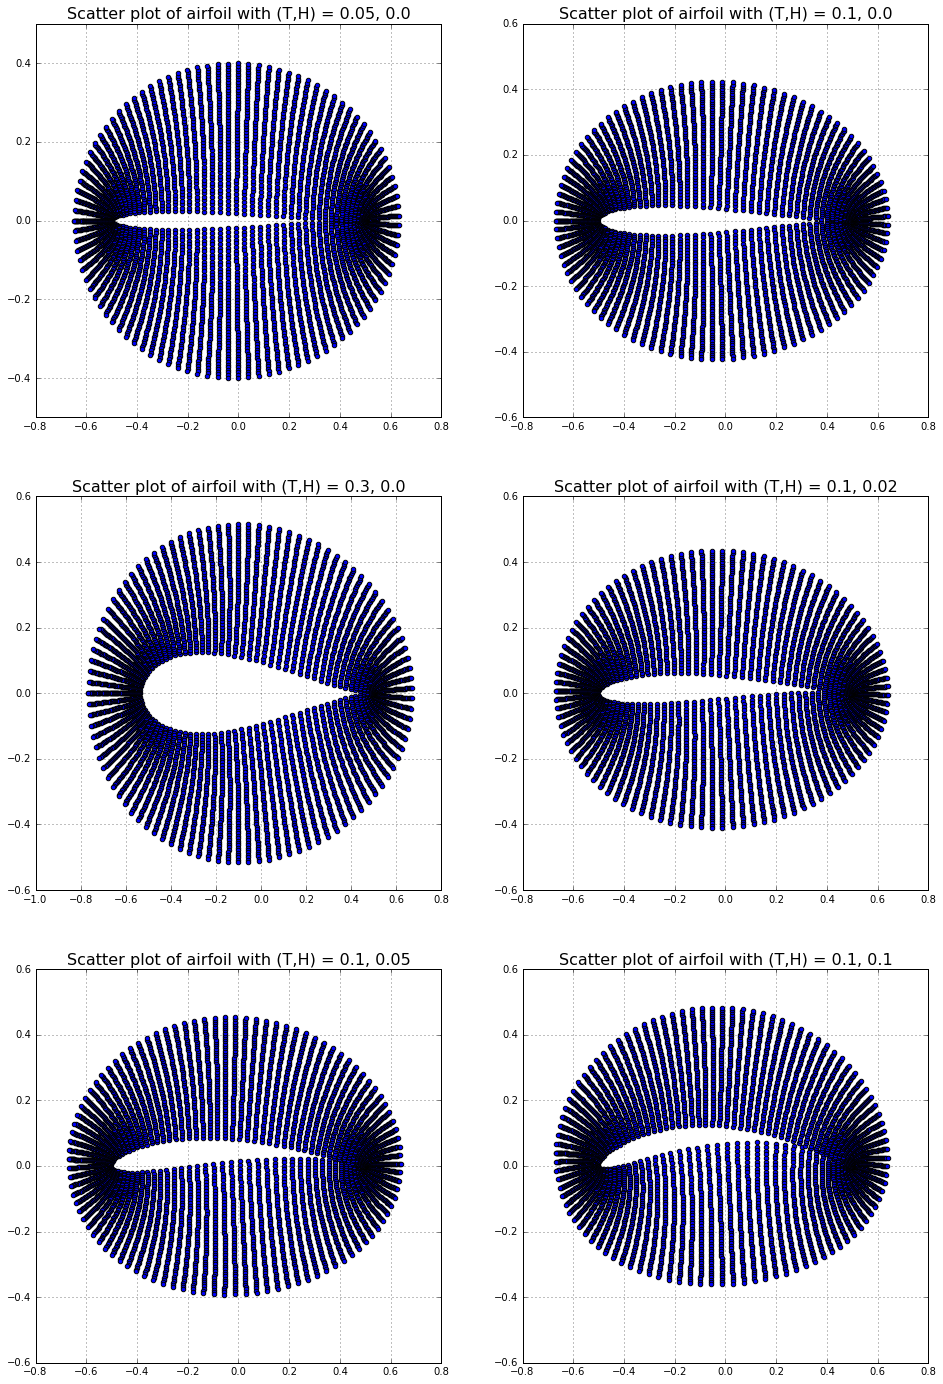

In [198]:
fig, ax = pyplot.subplots(nrows=3, ncols=2)
fig.set_figheight(24); fig.set_figwidth(16)

c = 1.0
a = c/4.

ic = 0
for i_n in range(3):
    for j_n in range(2):
        
        zeta_c = -4*a/(3*math.sqrt(3))*T[ic] + 1j*2*a*H[ic]
        r_s = (0.25 +T[ic]/(3*math.sqrt(3)))
        
        azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
        rad = numpy.linspace(r_s,2.0*r_s,ngrad);

        r, theta = numpy.meshgrid(rad, azimuth)

        zeta = r*numpy.exp(1j*theta)

        Z = JoukowskiTransform(zeta, zeta_c,a)
        
        len_chord = Z[(numpy.argmin(abs(azimuth))),(rad==r_s)].real - \
        Z[(azimuth==math.pi),(rad==r_s)].real;
        
        imid = int(ngtheta/2)
        thickness = numpy.max(Z.imag[imid:,0])
        locmax = numpy.argmax(Z.imag[imid:,0])
        #thickness = Z.imag[locmax,0]-Z.imag[ngtheta-locmax,0]        
        aJou = len_chord/4.0;
        
        #print(Z.imag[locmax,0], Z.imag[ngtheta-locmax,0])
        print('For (T,H): ', T[ic],H[ic])
        print('Computed Thickness', 2.0*thickness)
        print('Thickness ratio:', 2.0*thickness/len_chord)
        print('')
        
        #Post processing
        string = 'Scatter plot of airfoil with (T,H) = '
        string +=str(T[ic])
        string +=', '
        string +=str(H[ic])
        ic += 1
        
        #plot data
        #ax[i_n,j_n].scatter(Z.real[:,0], Z.imag[:,0])
        ax[i_n,j_n].scatter(Z.real, Z.imag)
        ax[i_n,j_n].grid(True)
        ax[i_n,j_n].set_title(string, fontsize = 16)
        #ax[i_n,j_n].set_xlim(-0.5,0.5)
        #ax[i_n,j_n].set_ylim(-0.5,0.5)

At smaller values of H and T, the computed values of thickness are relatively accurate. As the values of H and T are increased, the errors in the corresponding computed values also increase.

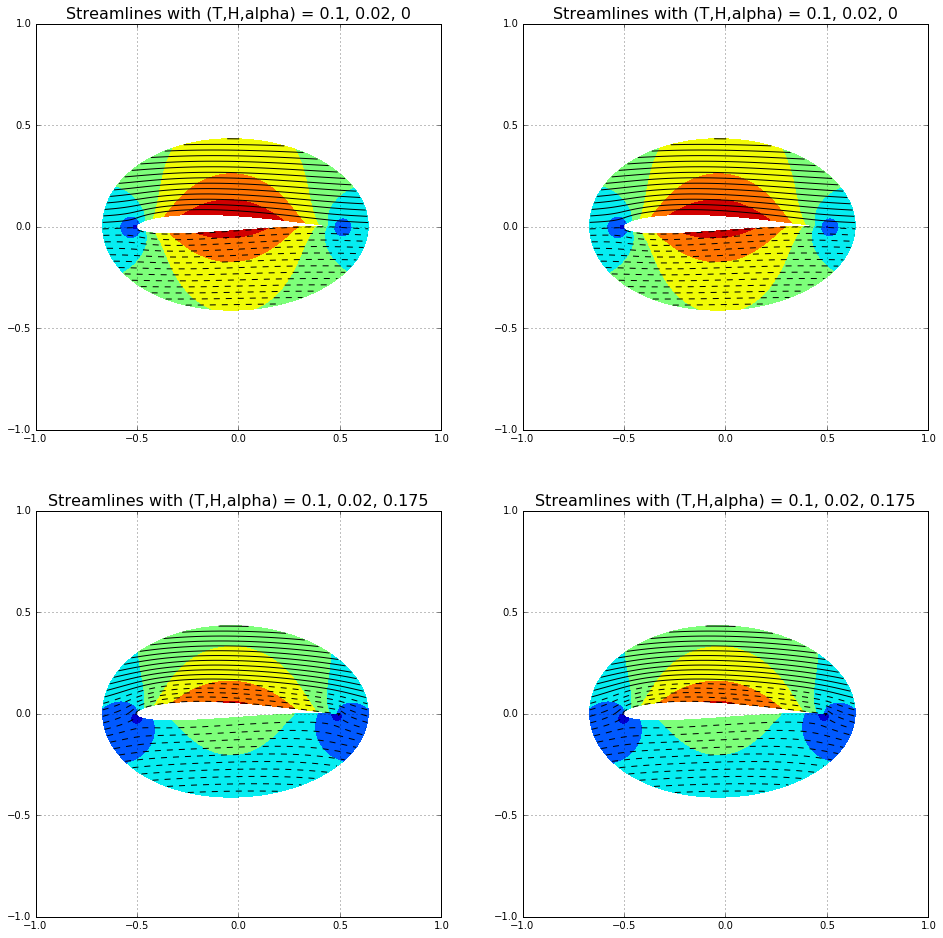

In [201]:
T = [0.1, 0.1]
H = [0.02, 0.05]
alpha = [0, 0.175] 

fig, ax = pyplot.subplots(nrows=2, ncols=2)
fig.set_figheight(16); fig.set_figwidth(16)

c = 1.0
a = c/4.

ic = 0

for j_n in range(2):
    for i_n in range(2):        
        zeta_c = -4*a/(3*math.sqrt(3))*T[ic] + 1j*2*a*H[ic]
        r_s = (0.25 +T[ic]/(3*math.sqrt(3)))

        azimuth = numpy.radians(numpy.linspace(-180,180,ngtheta));
        rad = numpy.linspace(r_s,2.0*r_s,ngrad);

        r, theta = numpy.meshgrid(rad, azimuth)
        ur = numpy.zeros_like(r);
        ut = numpy.zeros_like(theta);
        velx = numpy.zeros_like(theta);
        vely = numpy.zeros_like(theta);    

        uinf = 1.0; a2 = r_s**2;
        kappa = 2.0*math.pi*uinf*a2;
        gamma = 4.0*math.pi*math.sqrt(a2)*uinf*numpy.sin(alpha[j_n]+2*H[ic])

        vel = numpy.sqrt(ur**2+ut**2)
        zeta = r*numpy.exp(1j*theta)

        W_vor = 1j*(gamma/2.0/math.pi)*numpy.log(zeta)
        wvel_vor = 1j*(gamma/2.0/math.pi)/zeta

        W_doublet = kappa/(2.0*math.pi*zeta)
        wvel_doublet = -kappa/(2.0*math.pi*zeta**2)

        W_FS = uinf*numpy.exp(-1j*alpha[ic])*zeta
        wvel_FS = uinf*numpy.exp(-1j*alpha[ic])*numpy.ones_like(zeta)

        W = W_FS + W_doublet + W_vor
        wvel = wvel_FS + wvel_doublet + wvel_vor


        Z = JoukowskiTransform(zeta, zeta_c,a)
        w = JoukowskiTransform(wvel, zeta_c,a)

        #Post processing
        string = 'Streamlines with (T,H,alpha) = '
        string +=str(T[ic])
        string +=', '
        string +=str(H[ic])
        string +=', '
        string +=str(alpha[j_n])
        ic += 1
        if (ic == 1):
            ic = 0

        #print(numpy.shape(Z), numpy.shape(velx))

        #plot data
        ax[j_n,i_n].contourf(Z.real, Z.imag, abs(wvel))
        ax[j_n,i_n].contour(Z.real, Z.imag, W.imag, 30, colors = '#000000')
        ax[j_n,i_n].grid(True)
        ax[j_n,i_n].set_title(string, fontsize = 16)
        ax[j_n,i_n].set_xlim(-1.0,1.0)
        ax[j_n,i_n].set_ylim(-1.0,1.0)

    #pyplot.subplot(121)
